In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.io.fits as fitsio
from astropy.coordinates import SkyCoord
import astropy.units as u
import healpy as hp

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import warnings
warnings.filterwarnings('ignore')

from importlib import reload
import sys
sys.path.append('/Users/nora/projects/stream_search/code')
import plot_density
reload(plot_density)
import streamlib
reload(streamlib)
import skymap
reload(skymap)
print(skymap.__version__)
import galstreams
reload(galstreams)
import plot_density_healpy
reload(plot_density_healpy)
import rotation_matrix

0.2.0


In [5]:
mw_streams = galstreams.MWStreams(verbose=False)

In [6]:
plot_density.plot_pretty(figsize=(12,12))

In [145]:
filename = '/Users/nora/projects/stream_search/data/BASS_iso_hpxcube_z0.0001_a13.5_gmax23.fits.gz'
hpxcube, fracdet, modulus = plot_density.load_hpxcube(filename)

filename = '/Users/nora/projects/stream_search/data/BASS_iso_hpxcube_z0.0010_a13.5_gmax23.fits.gz'
hpxcube001, fracdet, modulus = plot_density.load_hpxcube(filename)

filename = '/Users/nora/projects/stream_search/data/BASS_iso_hpxcube_z0.0001_a13.5_gmax22.fits.gz'
hpxcube22, fracdet, modulus = plot_density.load_hpxcube(filename)

Reading /Users/nora/projects/stream_search/data/BASS_iso_hpxcube_z0.0001_a13.5_gmax23.fits.gz...
Skipping fracdet...
Reading /Users/nora/projects/stream_search/data/BASS_iso_hpxcube_z0.0010_a13.5_gmax23.fits.gz...
Skipping fracdet...
Reading /Users/nora/projects/stream_search/data/BASS_iso_hpxcube_z0.0001_a13.5_gmax22.fits.gz...
Skipping fracdet...


In [147]:
np.unique(hpxcube%1)

array([0.])

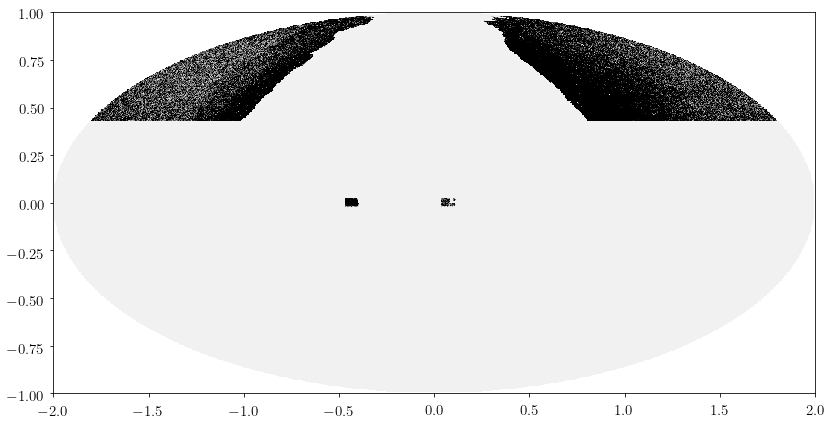

In [35]:
mu = 16.0
hpxmap = np.sum(hpxcube[:,np.argmin(np.abs(mu-modulus))-5:np.argmin(np.abs(mu-modulus))+5], axis=1)
nside = hp.npix2nside(hpxmap.shape[0])
func = lambda x, y, z: hp.vec2pix(nside, x, y, z)

proj = hp.projector.MollweideProj(xsize=1024)
img = proj.projmap(hpxmap, func)


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(img, origin='bottom', vmin=-10, vmax=80, cmap='Greys', extent=proj.get_extent())
plt.show()

In [77]:
x.min(), x.max(), y.min(), y.max()

(-0.0459929611087021,
 0.045992894360394686,
 -0.21797998607408484,
 0.2179803396902507)

16 16
[[192.94215562757648, 62.89347555302101], [160.10994400299722, 46.12690712812782]]
173.04145059348573 55.58008962212617 43.98226690048853
m-M = 16.0


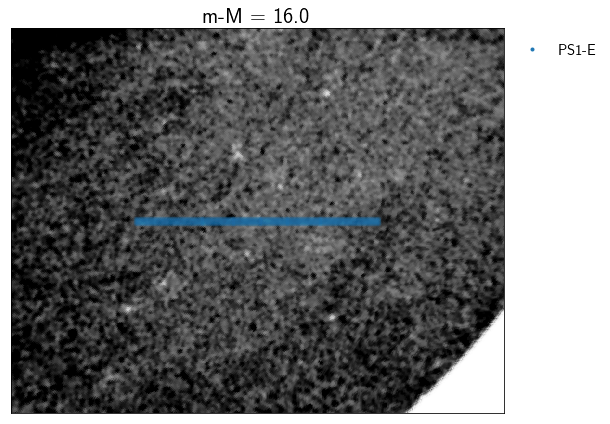

In [98]:
reload(plot_density_healpy)
stream = 'PS1-E'
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])

# ax, proj = plot_density_healpy.plot_stream(hpxcube, modulus, stream=None, ends=[[185,80],[195,80]], mu_min=16, mu_max=16, save=False)
# ax, proj = plot_density_healpy.plot_stream(hpxcube, modulus, stream=None, ends=[[185,60],[195,60]], mu_min=16, mu_max=16, save=False, plot_streams=True)

ax, proj = plot_density_healpy.plot_stream(hpxcube, modulus, stream='PS1-E', ends=None, mu_min=16, mu_max=16, save=False, plot_streams=True)
# ax, proj = plot_density_healpy.plot_stream(hpxcube, modulus, stream='PS1-E', ends=None, mu_min=16, mu_max=16, save=False, plot_streams=False)



15.0 15.0
[(255, 48), (205, 53)]
231.41480159051912 53.22812341048539 -9.833375683269002
m-M = 15.0
xlim, ylim =  (-0.5951572749300663, 0.5951572749300663) (-0.46483935744782306, 0.46483935744782306)
[-0.28233105  0.28233105] [ 5.85070421e-05 -5.85070421e-05]


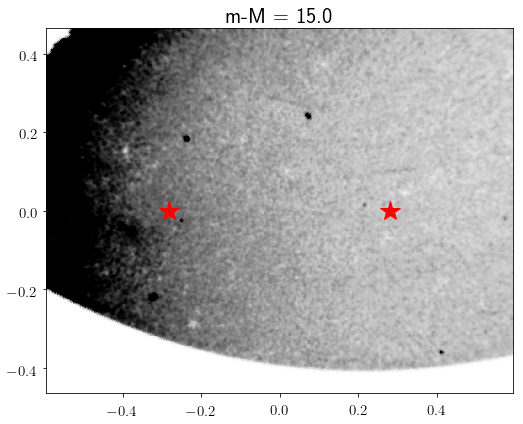

In [139]:
reload(plot_density_healpy)
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])

# ax, proj = plot_density_healpy.plot_stream(hpxcube, modulus, stream=stream, mu_min=14, mu_max=20, savedir='../plots/bass/view1/', save=True)
# ax, proj = plot_density_healpy.plot_stream(hpxcube, modulus, stream=None, ends=[[185,60],[195,60]], mu_min=16, mu_max=16, savedir='../plots/bass/view1/', save=False)

stream = 'PS1-E'
ends = [(255, 48), (205, 53)]
mu = 15.0

# plot_density_healpy.plot_stream(hpxcube22, modulus, stream=None, ends=ends, mu_min=14.0, mu_max=19.0, reso=4.0, savedir='/Users/nora/projects/stream_search/plots/zoom/New1/mov3/', save=True, plot_streams=False)
# plot_density_healpy.plot_stream(hpxcube22, modulus, stream=None, ends=ends, mu_min=mu, mu_max=mu, reso=4.0, savedir='/Users/nora/projects/stream_search/plots/zoom/New1/mov3/', save=True, plot_streams=True)
ax, proj = plot_density_healpy.plot_stream(hpxcube, modulus, stream=None, ends=ends, mu_min=mu, mu_max=mu, reso=4.0, savedir='/Users/nora/projects/stream_search/plots/zoom/New1/mov3/', save=False, plot_streams=False)
# plot_density_healpy.plot_stream(hpxcube22, modulus, stream=None, ends=ends, mu_min=mu, mu_max=mu, reso=4.0, savedir='/Users/nora/projects/stream_search/plots/zoom/New1/mov3/', save=False, plot_streams=False)

x, y = proj.ang2xy([255, 205], [48, 53], lonlat=True)
print(x, y)
ax.plot(x, y, 'r*', ms=20, zorder=1000)
plt.show()

In [168]:
import load_data
reload(load_data)
hpxcube, fracdet, modulus = load_data.load_data('BASS', 0.0001, 13.5, 23.0)

Reading /Users/nora/projects/stream_search/data/BASS_iso_hpxcube_z0.0001_a13.5_gmax23.fits.gz...
Reading ../data/BASS_nside256.fits.gz


190.0 60.09449859371734 -0.0014671318672502597
16


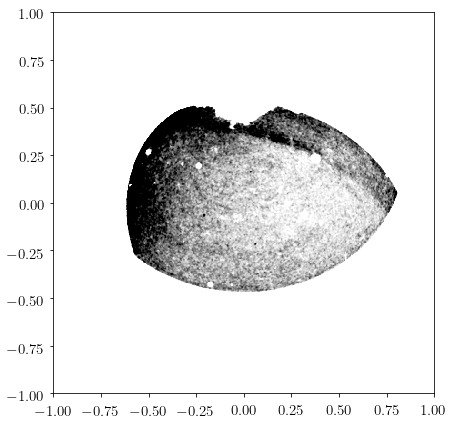

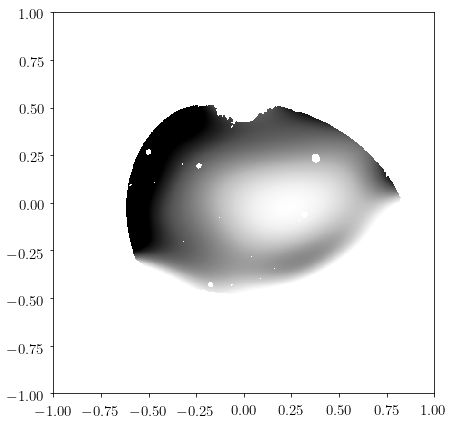

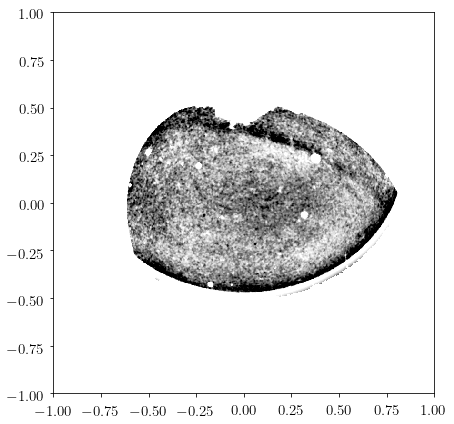

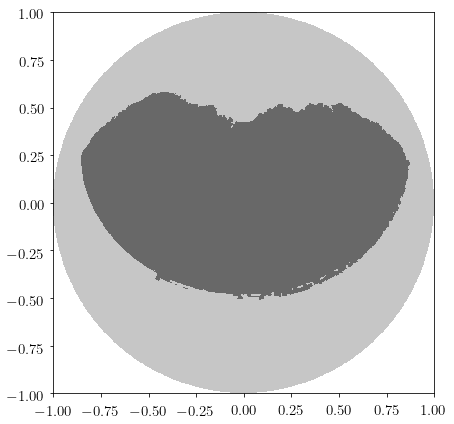

In [176]:
reload(streamlib)
reload(plot_density_healpy)
reload(load_data)
# proj = plot_density_healpy.get_gnomonic_proj(ends=[[185,60],[195,60]])
proj = plot_density_healpy.get_ortho_proj(ends=[[185,60],[195,60]])

# for mu in np.arange(15, 19+0.05, 0.1):
for mu in [16]:
    print(mu)
#     data = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.1, fracmin=0.5, clip=100, sgr=True)
#     bkg = plot_density_healpy.fit_bkg(data, proj, sigma=0.1)
    
#     plot_density_healpy.plot_proj(proj, data)
#     plt.savefig('../plots/zoom/190-60/mov5/190-60_%.1f.png' %mu)
    
#     plot_density_healpy.plot_proj(proj, data-bkg, vmin=-2, vmax=2)
#     plt.savefig('../plots/zoom/190-60/mov6/190-60_%.1f.png' %mu)
    
    data = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, sgr=True, globs_dwarfs=True, acs=False)
    plot_density_healpy.plot_proj(proj, data)
    bkg = plot_density_healpy.fit_bkg(data, proj, sigma=0.2)
    plot_density_healpy.plot_proj(proj, bkg)
    plot_density_healpy.plot_proj(proj, data-bkg, vmin=-2, vmax=2)
    plot_density_healpy.plot_proj(proj, fracdet, vmin=-1, vmax=2)
#     plt.savefig('../plots/zoom/190-60/mov7/190-60_%.1f.png' %mu)
#     plt.close('all')
    

In [196]:
reload(streamlib)
reload(plot_density_healpy)
reload(load_data)
# proj = plot_density_healpy.get_gnomonic_proj(ends=[[175,60],[185,60]], xsize=2400, ysize=1800)

proj = plot_density_healpy.get_ortho_proj(ends=[[175,70],[185,70]], half_sky=True)
xmin, xmax, ymin, ymax = -0.8, 0.8, -0.75, 0.5

for mu in np.arange(15, 19+0.05, 0.1):
# for mu in [16]:
    print(mu)
    
    data = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, sgr=True, globs_dwarfs=True, acs=True)
    data_unm = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, sgr=True, globs_dwarfs=True, acs=False)
#     plot_density_healpy.plot_proj(proj, data)
    bkg = plot_density_healpy.fit_bkg(data, proj, sigma=0.2)
    bkg.mask = data_unm.mask
#     plot_density_healpy.plot_proj(proj, bkg)
    ax = plot_density_healpy.plot_proj(proj, data_unm-bkg, vmin=-2, vmax=2)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title('m - M = %.1f' %mu)
#     plot_density_healpy.plot_proj(proj, fracdet, vmin=-1, vmax=2)

    plt.savefig('../plots/zoom/180-70/mov2/180-70_%.1f.png' %mu)
    plt.close('all')
    

180.0 70.07010393543698 0.00039179905880900613
15.0
15.1
15.2
15.299999999999999
15.399999999999999
15.499999999999998
15.599999999999998
15.699999999999998
15.799999999999997
15.899999999999997
15.999999999999996
16.099999999999994
16.199999999999996
16.299999999999997
16.399999999999995
16.499999999999993
16.599999999999994
16.699999999999996
16.799999999999994
16.89999999999999
16.999999999999993
17.099999999999994
17.199999999999992
17.29999999999999
17.39999999999999
17.499999999999993
17.59999999999999
17.69999999999999
17.79999999999999
17.89999999999999
17.99999999999999
18.099999999999987
18.19999999999999
18.29999999999999
18.399999999999988
18.499999999999986
18.599999999999987
18.69999999999999
18.799999999999986
18.899999999999984
18.999999999999986


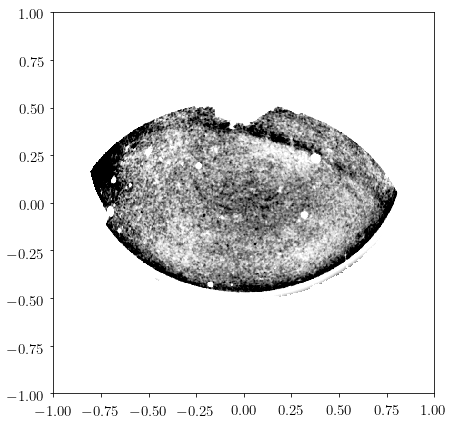

In [174]:
data = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, sgr=True, globs_dwarfs=True, acs=False)
bkg = plot_density_healpy.fit_bkg(data, proj, sigma=0.2)
plot_density_healpy.plot_proj(proj, data-bkg, vmin=-2, vmax=2)
